## Titanic: Machine Learning from Disaster

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('../../data/train.csv')
data_test = pd.read_csv('../../data/test.csv')

data_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
691,692,1,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S


In [3]:
data_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
328,1220,2,"Clarke, Mr. Charles Valentine",male,29.0,1,0,2003,26.0000,NaN,S
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.0,0,2,SOTON/O.Q. 3101315,13.7750,NaN,S
43,935,2,"Corbett, Mrs. Walter H (Irene Colvin)",female,30.0,0,0,237249,13.0000,NaN,S
282,1174,3,"Fleming, Miss. Honora",female,NaN,0,0,364859,7.7500,NaN,Q
225,1117,3,"Moubarek, Mrs. George (Omine Amenia"" Alexander)""",female,NaN,0,2,2661,15.2458,NaN,C


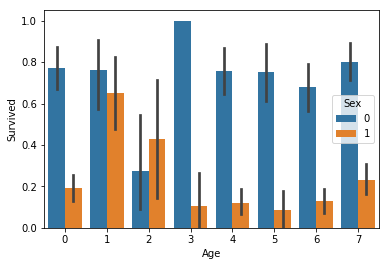

In [20]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

In [5]:
data_train['Fare'].min()

0.0

In [6]:
def groupAge(df):
    age = df['Age']
    df['Age'].fillna(-0.5, inplace =True)
    ages = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    categories = ['Unknown','Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    df['Age'] = pd.cut(age, ages, labels=categories)
    return df

def dropColumns(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1, inplace=True)

def groupFare(df):
    fare = df['Fare']
    fare.fillna(-0.5)
    fares = (-1, 0, 8, 15, 31, 1000)
    categories = ['Unknown','1_quartile', '2_quartile', '3_quartile', '4_quartile']
    df['Fare'] = pd.cut(fare, fares, labels=categories)
    return df

def formatCabin(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Cabin']  = df['Cabin'] .apply(lambda a: a[0])
    return df

def formatName(df):
    df['Surname'] = df['Name'].apply(lambda a: a.split(' ')[0])
    df['Prefix'] = df['Name'].apply(lambda a: a.split(' ')[1])
    return df
    
groupAge(data_train)
groupFare(data_train)
formatCabin(data_train)
formatName(data_train)
dropColumns(data_train)
groupAge(data_test)
groupFare(data_test)
formatCabin(data_test)
formatName(data_test)
dropColumns(data_test)
data_train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Surname,Prefix
849,850,1,1,female,Unknown,1,0,4_quartile,C,"Goldenberg,",Mrs.
143,144,0,3,male,Student,0,0,1_quartile,N,"Burke,",Mr.
153,154,0,3,male,Adult,0,2,2_quartile,N,van,"Billiard,"
825,826,0,3,male,Unknown,0,0,1_quartile,N,"Flynn,",Mr.
312,313,0,2,female,Young Adult,1,1,3_quartile,N,"Lahtinen,",Mrs.


In [7]:
data_train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Surname,Prefix
85,86,1,3,female,Young Adult,3,0,3_quartile,N,"Backstrom,",Mrs.
48,49,0,3,male,Unknown,2,0,3_quartile,N,"Samaan,",Mr.
52,53,1,1,female,Adult,1,0,4_quartile,D,"Harper,",Mrs.
646,647,0,3,male,Student,0,0,1_quartile,N,"Cor,",Mr.
308,309,0,2,male,Young Adult,1,0,3_quartile,N,"Abelson,",Mr.


In [10]:
features = ['Fare', 'Cabin', 'Age', 'Sex', 'Surname', 'Prefix']
data_train[features] = data_train[features].astype(str,copy=False)
data_train[features].dtypes

Fare       object
Cabin      object
Age        object
Sex        object
Surname    object
Prefix     object
dtype: object

In [11]:
data_test.dtypes

PassengerId       int64
Pclass            int64
Sex              object
Age            category
SibSp             int64
Parch             int64
Fare           category
Cabin            object
Surname          object
Prefix           object
dtype: object

In [12]:
data_train.isna().sum(), data_test.isna().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Cabin          0
 Surname        0
 Prefix         0
 dtype: int64, PassengerId    0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Cabin          0
 Surname        0
 Prefix         0
 dtype: int64)

In [13]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Surname', 'Prefix']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Surname,Prefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [14]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Surname,Prefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


In [15]:
y_train = data_train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [16]:
X_train = data_train.drop(['Survived'],axis=1)

In [17]:
X_train.shape, y_train.shape

((891, 10), (891,))

In [18]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Surname,Prefix
0,1,3,1,4,1,0,0,7,100,19
1,2,1,0,0,1,0,3,2,182,20
2,3,3,0,7,0,0,0,7,329,16
3,4,1,0,7,1,0,3,2,267,20
4,5,3,1,7,0,0,1,7,15,19


In [19]:
X_test = data_test

## Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Инициализируем случайный лес с 100 деревьями и сбалансированными классами 
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, 
                            class_weight='balanced')

## Будем искать лучшие параметры среди следующего набора
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}

## Делаем опять же стратифицированную k-fold валидацию. Инициализация которой должна у вас продолжать храниться в skf
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [22]:
rf_grid_search = GridSearchCV(rf, parameters, n_jobs=-1, 
                              scoring ='roc_auc', cv=skf,
                             verbose=True)


In [23]:
%%time
rf_grid_search = rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s


Wall time: 11.7 s


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   11.4s finished


In [37]:
rf_grid_search.best_score_

0.8722922416520331

In [25]:
# функция для записи прогнозов в файл
def write_to_submission_file(predicted_labels, out_file,
                             target='Survived', index_label="PassengerId"):
    predicted_df = pd.DataFrame(list(predicted_labels.items()),
                      columns=['PassengerId','Survived'])
    predicted_df = predicted_df.set_index('PassengerId')
    predicted_df.to_csv(out_file)

In [38]:
test_pred = rf_grid_search.predict(X_test)

In [33]:
predicted_labels = dict(zip(X_test['PassengerId'], test_pred))

In [34]:
len(predicted_labels)

418

In [35]:
predicted_labels

{892: 0,
 893: 1,
 894: 0,
 895: 0,
 896: 1,
 897: 0,
 898: 1,
 899: 0,
 900: 1,
 901: 0,
 902: 0,
 903: 0,
 904: 1,
 905: 0,
 906: 1,
 907: 1,
 908: 0,
 909: 0,
 910: 1,
 911: 0,
 912: 0,
 913: 1,
 914: 1,
 915: 0,
 916: 1,
 917: 0,
 918: 1,
 919: 0,
 920: 1,
 921: 0,
 922: 0,
 923: 0,
 924: 1,
 925: 1,
 926: 1,
 927: 0,
 928: 1,
 929: 0,
 930: 0,
 931: 0,
 932: 0,
 933: 1,
 934: 0,
 935: 1,
 936: 1,
 937: 0,
 938: 1,
 939: 0,
 940: 1,
 941: 0,
 942: 0,
 943: 0,
 944: 1,
 945: 1,
 946: 0,
 947: 0,
 948: 0,
 949: 0,
 950: 0,
 951: 1,
 952: 0,
 953: 0,
 954: 0,
 955: 1,
 956: 1,
 957: 1,
 958: 1,
 959: 0,
 960: 1,
 961: 1,
 962: 1,
 963: 0,
 964: 1,
 965: 1,
 966: 1,
 967: 1,
 968: 0,
 969: 1,
 970: 0,
 971: 1,
 972: 1,
 973: 0,
 974: 0,
 975: 0,
 976: 0,
 977: 0,
 978: 1,
 979: 0,
 980: 1,
 981: 1,
 982: 1,
 983: 0,
 984: 1,
 985: 0,
 986: 0,
 987: 0,
 988: 1,
 989: 0,
 990: 1,
 991: 0,
 992: 1,
 993: 0,
 994: 0,
 995: 0,
 996: 1,
 997: 0,
 998: 0,
 999: 0,
 1000: 0,
 1001: 0,
 1002: 0

In [36]:
write_to_submission_file(predicted_labels,'../competitions/random_forest_1.csv')

## Log regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [45]:
%%time
lr.fit(X_train, y_train)

Wall time: 5.96 ms


C:\Users\Diana_Aimbetova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
y_pred = lr.predict(X_test)
acc_log = round(lr.score(X_train, y_train) * 100, 2)
acc_log

79.8

In [49]:
predicted_labels = dict(zip(X_test['PassengerId'], y_pred))

In [50]:
write_to_submission_file(predicted_labels,'../competitions/log_reg_1.csv')